<a href="https://colab.research.google.com/github/divyanshu144/Blog_app/blob/master/Ml_programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import csv
a=[]
with open('data.csv') as csfile:
  reader = csv.reader(csfile)
  for row in reader:
    a.append(row)
    print(row)
num_attributes = len(a[0])-1

general_hypothesis = ["?"]*num_attributes
specific_hypothesis = ["0"]*num_attributes

print("General hypothesis : ", general_hypothesis)
print("Specific hyothesis : ", specific_hypothesis)

hyothesis = specific_hypothesis
hypothesis = a[0][:-1]

print("\n Find-S algorithm")
for i in range (len(a)):
  if a[i][num_attributes] == "Yes":
    for j in range (num_attributes):
      if a[i][j] != hypothesis[j]:
        hypothesis[j] = "?"
  print("The training example no : ", i+1 ,"the hypthesis is : ", hypothesis)
print("\n Max specific hyoithesis is :")
print(hypothesis)

['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes']
['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No']
['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']
General hypothesis :  ['?', '?', '?', '?', '?', '?']
Specific hyothesis :  ['0', '0', '0', '0', '0', '0']

 Find-S algorithm
The training example no :  1 the hypthesis is :  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
The training example no :  2 the hypthesis is :  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
The training example no :  3 the hypthesis is :  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
The training example no :  4 the hypthesis is :  ['Sunny', 'Warm', '?', 'Strong', '?', '?']

 Max specific hyoithesis is :
['Sunny', 'Warm', '?', 'Strong', '?', '?']


CANDIDATE ELIMINATION

In [26]:
import csv
a = []
with open('data.csv') as csfile:
  reader = csv.reader(csfile)
  for row in reader:
    a.append(row)
    print(row)

num_att = len(a[0])-1
G = ["?"]*num_att
S = ["0"]*num_att

print("\n General hypothesis: ", G)
print("\n Specific hypothesis: ", S)
temp = []

for i in range(0,num_att):
  S[i] = a[1][i]

#print(S)
for i in range(1,len(a)):
  if a[i][num_att] == "Yes":
    for j in range(0,num_att):
      if a[i][j] != S[j]:
        S[j] = '?'
      
      for j in range(0,num_att):
        for k in range(0,len(temp)):
          if temp[k][j] != S[j] and temp[k][j] != "?":
            del temp[k]

  if a[i][num_att] == "No":
    for j in range(0,num_att):
      if a[i][j] != S[j] and S[j] != "?":
        G[j] = S[j]
        temp.append(G)
        G = ["?"]*num_att

  print("\n", S)
  if temp == 0:
    print(G)
  else:
    print(temp)


['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes']
['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No']
['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']

 General hypothesis:  ['?', '?', '?', '?', '?', '?']

 Specific hypothesis:  ['0', '0', '0', '0', '0', '0']

 ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same']
[]

 ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'Same']]

 ['Sunny', 'Warm', 'High', 'Strong', '?', '?']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


Decision Tree

In [16]:
import pandas as pd
from math import *
from pprint import pprint

df = pd.read_csv('data1.csv')
data = df.values.tolist()

attr_names = df.columns.values.tolist()
def entropy(pos, neg):
	if pos == 0 or neg == 0:
		return 0
	tot = pos + neg
	return -pos / tot * log(pos / tot, 2) - neg / tot * log(neg / tot, 2)

def gain(data, attr, pos, neg):
	d, E, acu = {}, entropy(pos, neg), 0
	for i in data:
		if i[attr] not in d:
			d[i[attr]] = {}
		d[i[attr]][i[-1]] = 1 + d[i[attr]].get(i[-1], 0)
	for i in d:
		tot = d[i].get('Yes', 0) + d[i].get('No', 0)
		acu += tot / (pos + neg) * entropy(d[i].get('Yes', 0), d[i].get('No', 0))
	return E - acu
def build(data, attr_names):
	pos, sz = len([x for x in data if x[-1] == 'Yes']), len(data[0]) - 1
	neg = len(data) - pos
	if neg == 0 or pos == 0:
		return 'Yes' if neg == 0 else 'No' 
	root = max([[gain(data, i, pos, neg), i] for i in range(sz)])[1]
	fin, res = {}, {}
	uniq_attr = set([x[root] for x in data])
	for i in uniq_attr:
		res[i] = build([x[:root] + x[root + 1:] for x in data if x[root] == i], attr_names[:root] + attr_names[root+1:])
	fin[attr_names[root]] = res
	return fin

tree = build(data, attr_names)
pprint(tree)

{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Wind': {'Strong': {'Humidity': {'High': 'No',
                                                       'Normal': {'Temp': {'Cool': 'No',
                                                                           'Mild': 'Yes'}}}},
                               'Weak': 'Yes'}},
             'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}


ANN

In [20]:
import numpy as np
x = np.array(([2,9], [1,5],[3,6]), dtype = float)
y = np.array(([92], [86], [89]), dtype=float)
x = x/np.amax(x,axis=0)
y = y/100

def sigmoid(x):
	return (1/(1+np.exp(-x)))

def derivatives_sigmoid(x):
	return x*(1-x)

#initialize network
epoch = 7000
lr = 0.1
inputlayer = 2
hiddenlayer = 3
output = 1

wh = np.random.uniform(size=(inputlayer, hiddenlayer))
bh = np.random.uniform(size=(1, hiddenlayer))
wout = np.random.uniform(size=(hiddenlayer,output))
bout = np.random.uniform(size=(1, output))

for i in range(epoch):
	hinp1 = np.dot(x,wh)
	hinp = hinp1 + bh
	hlayer_act = sigmoid(hinp)
	outinp1 = np.dot(hlayer_act, wout)
	outinp = outinp1 + bout
	output = sigmoid(outinp)

EO = y-output
outgrad = derivatives_sigmoid(output)
d_output = EO*outgrad

Eh = d_output.dot(wout.T)
hiddengrad = derivatives_sigmoid(hlayer_act)

d_hiddenlayer = Eh * hiddengrad
wout += hlayer_act.T.dot(d_output) * lr

bout += np.sum(d_output, axis=0, keepdims=True)*lr
wh += x.T.dot(d_hiddenlayer) * lr


print("Input: \n" + str(x))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n", output)


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.85089624]
 [0.82786082]
 [0.84489909]]


program 5

In [3]:
import csv
import math
import random
#Handle data
def loadCsv(Data5):
	lines = csv.reader(open(Data5, "r"))
	dataset = list(lines)
	for i in range(len(dataset)):
		dataset[i] = [float(x) for x in dataset[i]]
	return dataset

#Split dataset with ratio
def splitDataset(dataset, splitRatio):
	trainSize = int(len(dataset) * splitRatio)
	trainSet = []
	copy = list(dataset)
	
	while len(trainSet) < trainSize:
		index = random.randrange(len(copy))
		trainSet.append(copy.pop(index))
	return [trainSet, copy]

#Separate by Class
#function assumes that the last attribute (-1) is the class value
#The function returns a map of class values to lists of data instances.
def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated

#Calculate Mean
#We need to calculate the mean of each attribute for a class value
def mean(numbers):
	return sum(numbers)/float(len(numbers))

def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)

#Summarize Dataset
#The zip function groups the values for each attribute across our data instances into their own lists 
def summarize(dataset):
	summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
	del summaries[-1]
	return summaries

#Summarize attributes by class
def summarizeByClass(dataset):
	separated = separateByClass(dataset)
	summaries = {}
	for classValue, instances in separated.items():
		summaries[classValue] = summarize(instances)
	return summaries

#Calculate Gaussian Probability Density Function
def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1/(math.sqrt(2*math.pi)*stdev))*exponent
#Calculate Class Probabilities
def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
		return probabilities
#Make a prediction
def predict(summaries, inputVector):
	probabilities = calculateClassProbabilities(summaries, inputVector)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel
#Get predictions
def getPredictions(summaries, testSet):
	predictions = []
	for i in range(len(testSet)):
		result = predict(summaries, testSet[i])
		predictions.append(result)
	return predictions
#Get Accuracy
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet)))*100.0

def main():
	filename = 'Data5.csv'
	splitRatio = 0.68
	dataset = loadCsv(filename)
	trainingSet, testSet = splitDataset(dataset, splitRatio)
	print('Split {0} rows into train = {1} and test = {2} rows'.format(len(dataset),len(trainingSet),len(testSet)))
	#prepare model
	summaries = summarizeByClass(trainingSet)
	#test model
	predictions = getPredictions(summaries, testSet)
	accuracy = getAccuracy(testSet, predictions)
	print('Accuracy: {0}%'.format(accuracy))

main()

Split 768 rows into train = 522 and test = 246 rows
Accuracy: 35.77235772357724%


program 6

In [4]:
from sklearn.datasets import fetch_20newsgroups
#Load finenames and data from 20 newsgroups dataset
from sklearn.metrics import confusion_matrix #It is used to compute accuracy of classification
from sklearn.metrics import classification_report
#Build a text report showing the main classifications metrics
import numpy as np
import os
categories=['alt.atheism','soc.religion.christian','comp.graphics','sci.med']
twenty_train=fetch_20newsgroups(subset='train',categories=categories,shuffle=True)
twenty_test=fetch_20newsgroups(subset='test',categories=categories,shuffle=True)
#OFFILINE MODE
#twenty_train=fetch_20newsgroups(data_home='./scikit_learn_data',subset='train',shuffle=True)
#print("Training dataset:\n",twenty_train)
#twenty_test=fetch_20newsgroups(data_home='./scikit_learn_data',subset='test',shuffle=True)
#print("Test dataset:\n",twenty_test)
print("Number of Training Examples:",len(twenty_train.data))
print("Number of Test Examples:",len(twenty_test.data))
print(twenty_train.target_names)
#output of count vectoriser is a sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
X_train_tf=count_vect.fit_transform(twenty_train.data)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(X_train_tf)
X_train_tfidf.shape
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
mod=MultinomialNB()
mod.fit(X_train_tfidf,twenty_train.target)
X_test_tf=count_vect.transform(twenty_test.data)
X_test_tfidf=tfidf_transformer.transform(X_test_tf)
predicted=mod.predict(X_test_tfidf)
#printing accuracy, Confusion matrix, Precision and Recall
print("Confusion matrix\n",metrics.confusion_matrix(twenty_test.target,predicted))
print("Accuracy:",accuracy_score(twenty_test.target,predicted))
print(classification_report(twenty_test.target,predicted,target_names=twenty_test.target_names))

Number of Training Examples: 2257
Number of Test Examples: 1502
['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
Confusion matrix
 [[192   2   6 119]
 [  2 347   4  36]
 [  2  11 322  61]
 [  2   2   1 393]]
Accuracy: 0.8348868175765646
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



program 7

In [ ]:
pip install pgmpy

In [8]:
import numpy as np
import csv
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
#read Cleveland Heart Disease data
heartDisease = pd.read_csv('Data7.csv')
heartDisease = heartDisease.replace('?',np.nan)

#display the data
print('Few examples from the dataset are given below')
print(heartDisease.head())

#Model Bayesian Network
model=BayesianModel([('age','trestbps'),('age','fbs'),('sex','trestbps'),('exang','trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),('heartdisease','restecg'),('heartdisease','thalach'),('heartdisease','chol')])
#Learning CPDs using Maximum Likelihood Estimators
print('\n Learning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)
# Inferencing with Bayesian Network
print('\n Inferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)

#computing the Probability of HeartDisease given Age
print('\n 1. Probability of HeartDisease given Age=30')
q=HeartDisease_infer.query(variables=['heartdisease'],evidence={'age':28}, joint=False)
print(q['heartdisease'])
#computing the Probability of HeartDisease given cholesterol
print('\n 2. Probability of HeartDisease given cholesterol=100')
q=HeartDisease_infer.query(variables=['heartdisease'],evidence={'chol':100}, joint=False)
print(q['heartdisease'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:519: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
Finding Elimination Order: :   0%|          | 0/7 [00:00<?, ?it/s]

Few examples from the dataset are given below
    age  sex   cp  trestbps   chol  ...  oldpeak  slope   ca  thal  heartdisease
0  63.0  1.0  1.0     145.0  233.0  ...      2.3    3.0  0.0   6.0             0
1  67.0  1.0  4.0     160.0  286.0  ...      1.5    2.0  3.0   3.0             2
2  67.0  1.0  4.0     120.0  229.0  ...      2.6    2.0  2.0   7.0             1
3  37.0  1.0  3.0     130.0  250.0  ...      3.5    3.0  0.0   3.0             0
4  41.0  0.0  2.0     130.0  204.0  ...      1.4    1.0  0.0   3.0             0

[5 rows x 14 columns]

 Learning CPD using Maximum likelihood estimators

 Inferencing with Bayesian Network:

 1. Probability of HeartDisease given Age=30


Eliminating: sex: 100%|██████████| 7/7 [00:00<00:00, 119.76it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.5932 |
+-----------------+---------------------+
| heartdisease(1) |              0.1714 |
+-----------------+---------------------+
| heartdisease(2) |              0.0811 |
+-----------------+---------------------+
| heartdisease(3) |              0.1138 |
+-----------------+---------------------+
| heartdisease(4) |              0.0405 |
+-----------------+---------------------+

 2. Probability of HeartDisease given cholesterol=100
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              1.0000 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.0000 |
+-----------------+---------------------+
| heartdisease(3) |  

program 8

Accuracy =  0.9066666666666666
Accuracy using GMM =  0.9666666666666667


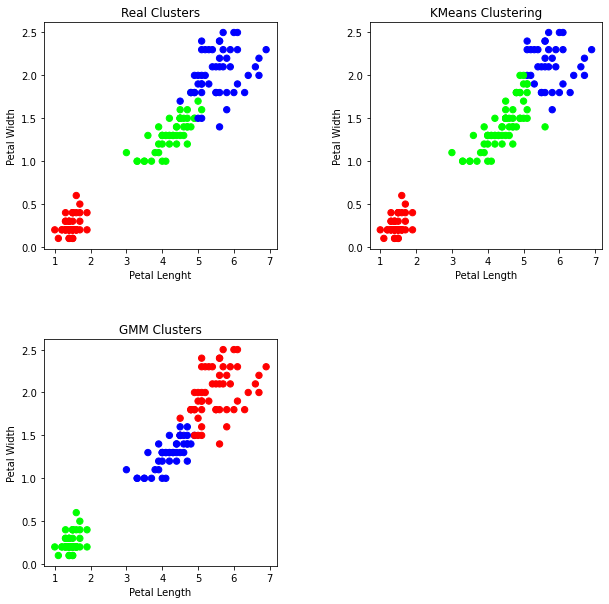

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

#Build the KMeans Model
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X)

from scipy.stats import mode
labels = np.zeros_like(clusters)

for i in range(5):
	cat = (clusters == i)
	labels[cat] = mode(iris.target[cat])[0]

acc = accuracy_score(iris.target, labels)
print('Accuracy = ', acc)

plt.figure(figsize = (10,10))
colormap = np.array(['red', 'lime', 'blue'])

# Real Clusters
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y.Targets], s = 40)
plt.title('Real Clusters')
plt.xlabel('Petal Lenght')
plt.ylabel('Petal Width')

# K-Means Output
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[labels], s = 40)
plt.title('KMeans Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

#General EM for GM
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

xs = pd.DataFrame(scaled_X, columns = X.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)

labels = np.zeros_like(clusters)

for i in range(3):
	cat = (gmm_y == i)
	labels[cat] = mode(iris.target[cat])[0]

acc = accuracy_score(iris.target, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[gmm_y], s=40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

program 9

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Feature Names:",iris.feature_names,"IrisData:\n",iris.data,"\nTargetNames:",iris.target_names,"\nTarget:",iris.target)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = .25)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(" Accuracy=",clf.score(X_test, y_test))
print("Predicted Data")
print(clf.predict(X_test))
prediction=clf.predict(X_test)
print("Test data :")
print(y_test)
diff=prediction-y_test
print("Result is ")
print(diff)
print('Total no of samples misclassified =', sum(abs(diff)))

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] IrisData:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2

program 10

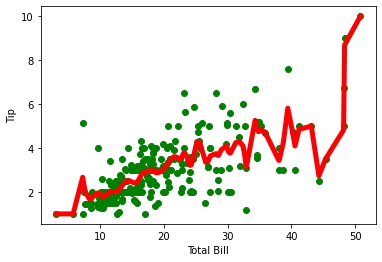

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
	m,n = np.shape(xmat)
	weights = np.mat(np.eye((m))) #eye - identity matrix
	for j in range(m):
		diff = point - X[j]
		weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
	return weights

def localWeight(point, xmat, ymat, k):
	wei = kernel(point, xmat, k)
	w = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
	return w

def localWeightRegression(xmat, ymat, k):
	m,n = np.shape(xmat)
	ypred = np.zeros(m)
	for i in range(m):
		ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat, k)
	return ypred

def graphPlot(X, ypred):
	sortindex = X[:, 1].argsort(0)
	xsort = X[sortindex][:,0]
	fig = plt.figure()
	ax = fig.add_subplot(1,1,1)
	ax.scatter(bill, tip, color = 'green')
	ax.plot(xsort[:, 1], ypred[sortindex], color = 'red', linewidth = 5)
	plt.xlabel('Total Bill')
	plt.ylabel('Tip')
	plt.show()

data = pd.read_csv('Data10.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)

mbill = np.mat(bill)
mtip = np.mat(tip)
m = np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T, mbill.T))

ypred = localWeightRegression(X, mtip, 0.5)
graphPlot(X,ypred)

In [16]:
import os
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.datasets import fetch_20newsgroups
import sklearn.datasets as skd
import numpy as np
categories=['alt.atheism','soc.religion.christian','comp.graphics','sci.med']
twenty_train=fetch_20newsgroups(subset='train',categories=categories,shuffle=True)
twenty_test=fetch_20newsgroups(subset='test',categories=categories,shuffle=True)
print(len(twen_train.data))
print(len(twen_test.data))
print(twen_train.target_names)

from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
X_train_tf=count_vect.fit_transform(twen_train.data)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_trans=TfidfTransformer()
X_train_tfidf=tfidf_trans.fit_transform(X_train_tf)
X_train_tfidf.shape

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
mod=MultinomialNB()
mod.fit(X_train_tfidf,twen_train.target)
X_test_tf=count_vect.transform(twen_test.data)
X_test_tfidf=tfidf_trans.transform(X_test_tf)
predicted=mod.predict(X_test_tfidf)
print(accuracy_score(twen_test.target,predicted))
print(classification_report(twen_test.target,predicted,target_names=twen_test.target_names))
print(confusion_matrix(twen_test.target,predicted))

11314
7532
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
0.7738980350504514
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92  